<a href="https://colab.research.google.com/github/FrankJRix/MF_gen_proto/blob/main/proc_gen_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

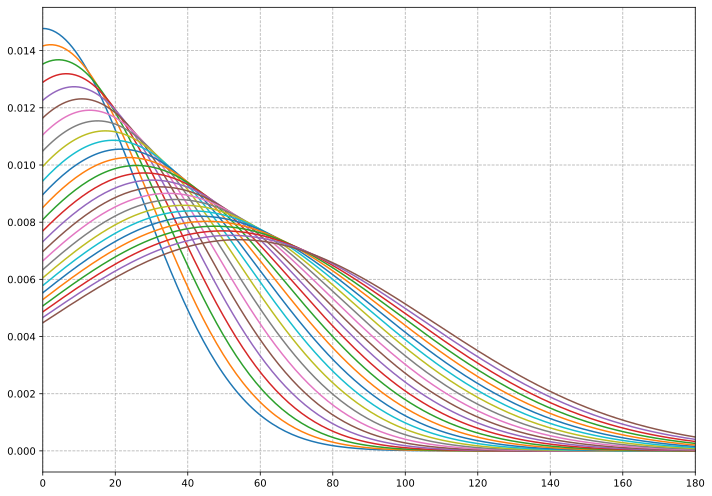

In [92]:
from numpy.core.function_base import linspace
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
np.set_printoptions( linewidth=200)

N_ROOMS = 25 # numero stanze - 1
MAX_WEIGHT = 180 # can be inferred probs, once everything is made better
FRACTION = 0.3
SIGMA_FACTOR = 0.15 # 1/15

class Room:
    # room of the dungeon generator whatever
    global_id = 0
    def __init__(self, lr, ud):
        type(self).global_id += 1
        self.id = type(self).global_id

        self.angle_lr = lr
        self.angle_ud = ud # might not be an angle
        self.base_weight = lr + ud # experimental
        self.weight_modifier = 1 # placeholder

        self.up = []
        self.down = []
        self.left = []
        self.right = []

        self.pos = [0,0,0]
        self.rotation = 0

        self.can_walk_back = False
        self.can_fly_back = False

def compute_sfn_parameters(n):
    M = MAX_WEIGHT
    N = N_ROOMS

    m = FRACTION * M/N

    mu = m * n
    sigma = SIGMA_FACTOR * (M + M*n/N)

    return mu, sigma

def slifat_normal(step, dim = 1):
    # M = MAX_WEIGHT
    # m = M / 40 # il magic number dipende da N_ROOMS

    # mu = m * step
    # sigma = np.sqrt( 1/2 * (M + M*step/2))
    mu, sigma = compute_sfn_parameters(step)

    return np.random.normal(mu, sigma, dim).round().item()
def slifat_normal_fun(t, step):
    mu, sigma = compute_sfn_parameters(step)

    return np.sqrt(1 / (2 * np.pi * sigma**2)) / np.exp((t - mu)**2 / (2 * sigma**2))

t = linspace(0, MAX_WEIGHT, 200)
dim = 1
dungeon = []

plt.figure(figsize=(10,7))
for step in range(N_ROOMS+1):
    if True: #step==N_ROOMS:
        plt.plot(t, slifat_normal_fun(t, step))
    w = max(0, slifat_normal(step, dim))
    w = min(w, MAX_WEIGHT)
    z = max(0, slifat_normal(step, dim))
    z = min(z, MAX_WEIGHT)

    dungeon.append(Room(w/2, z/4))

    #print(f"step #{step}: {w}")
    #print()

# for r in dungeon:
#     print(r.__dict__)

plt.grid(True, 'both', linestyle='--')
plt.xlim(0, MAX_WEIGHT)
#plt.legend(loc='lower right')
plt.tight_layout()

D = 5
for i in range(len(dungeon)-1):

    dungeon[i+1].pos[0] = dungeon[i].pos[0] + D * np.cos( np.radians( dungeon[i].rotation ) )
    dungeon[i+1].pos[1] = dungeon[i].pos[1] + D * np.sin( np.radians( dungeon[i].rotation ) )

    dungeon[i+1].pos[2] = dungeon[i].pos[2] - D * np.sin( np.radians( dungeon[i].angle_ud ) )
    dungeon[i+1].rotation = (dungeon[i].rotation + dungeon[i].angle_lr) % 360

map = []
for r in dungeon:
    map.append(r.pos)
map = np.array(map)

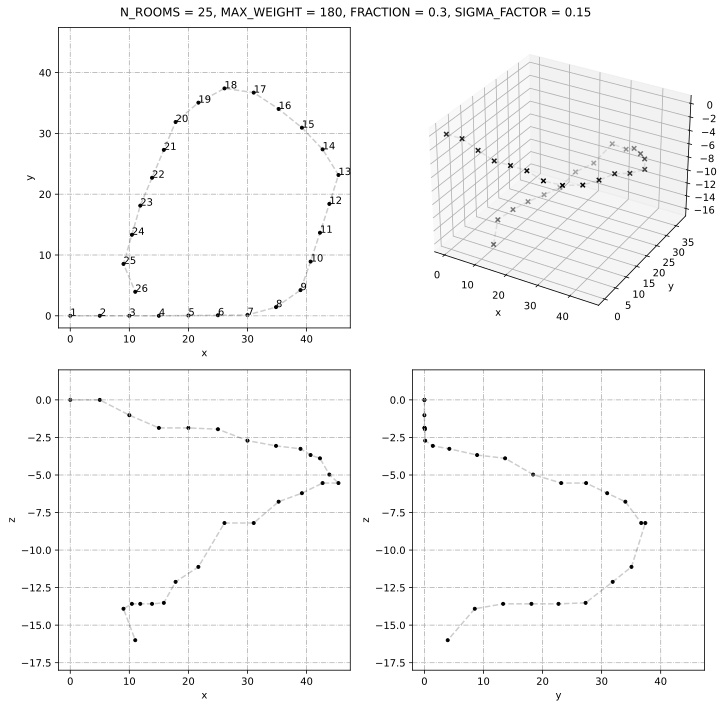

In [93]:
mn = min(map[:,0].min(), map[:,1].min())
mx = max(map[:,0].max(), map[:,1].max())

a = plt.figure(figsize = (10,10))

plt.subplot(2, 2, 1)
plt.scatter(map[:,0], map[:,1], marker='.', color='black')
plt.plot(map[:,0], map[:,1], linestyle='--', color='black', alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(mn-2, mx+2)
plt.ylim(mn-2, mx+2)
#plt.axis('equal')
plt.grid(linestyle = '-.')
for i in range(len(dungeon)):
    plt.annotate(f"{dungeon[i].id}", (map[i,0], map[i,1]))

plt.subplot(2, 2, 4)
plt.scatter(map[:,1], map[:,2], marker='.', color='black')
plt.plot(map[:,1], map[:,2], linestyle='--', color='black', alpha=0.2)
plt.xlabel('y')
plt.ylabel('z')
plt.xlim(mn-2, mx+2)
plt.ylim(map[:,2].min()-2, map[:,2].max()+2)
#plt.axis('equal')
plt.grid(linestyle = '-.')

plt.subplot(2, 2, 3)
plt.scatter(map[:,0], map[:,2], marker='.', color='black')
plt.plot(map[:,0], map[:,2], linestyle='--', color='black', alpha=0.2)
plt.xlabel('x')
plt.ylabel('z')
plt.xlim(mn-2, mx+2)
plt.ylim(map[:,2].min()-2, map[:,2].max()+2)
#plt.axis('equal')
plt.grid(linestyle = '-.')

ax = plt.subplot(2, 2, 2, projection='3d')
ax.scatter(map[:,0], map[:,1], map[:,2], marker='x', color='black')
ax.plot(map[:,0], map[:,1], map[:,2], linestyle='--', color='black', alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')

a.suptitle(f"N_ROOMS = {N_ROOMS}, MAX_WEIGHT = {MAX_WEIGHT}, FRACTION = {FRACTION}, SIGMA_FACTOR = {SIGMA_FACTOR}")
plt.tight_layout()
plt.savefig("mf_dungeon_test.pdf", bbox_inches='tight')
plt.show()